In [6]:
!pip install xgboost


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
import pandas as pd
data = pd.read_csv('pdata.csv')
data


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Bins,Years_Since_Establishment,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_Log
0,9.300,0.016047,249.8092,2346.861865,1999,3735.1380,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015920
1,5.920,0.019278,48.2692,1997.173039,2009,443.4228,0.0,15,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.019095
2,17.500,0.016760,141.6180,2348.624909,1999,2097.2700,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016621
3,19.200,0.000000,182.0950,338.642225,1998,732.3800,0.0,26,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,8.930,0.000000,53.8614,2300.396212,1987,994.7052,0.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2298.480338,1987,2778.3834,1.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.055230
8519,8.380,0.046982,108.1570,2194.155379,2002,549.2850,0.0,22,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.045912
8520,10.600,0.035186,85.1224,2440.182801,2004,1193.1136,0.0,20,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.034581
8521,7.210,0.145221,103.1332,1995.660445,2009,1845.5976,1.0,15,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.135597


In [5]:
X = data.drop(columns='Item_Outlet_Sales')
y = data['Item_Outlet_Sales']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.5),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor (SVR)': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

}


from sklearn.metrics import mean_squared_error, r2_score
results = {}

for name, model in models.items():
    # To train the model
    model.fit(X_train, y_train)
    # Prediction on the test set
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store metrics in the results dictionary
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Convert results to DataFrame and transpose for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                                         MSE  R2 Score
Linear Regression               1.147837e+06  0.577686
Random Forest                   8.423639e+05  0.690076
Gradient Boosting               3.133082e+05  0.884727
Ridge Regression                1.145565e+06  0.578522
Lasso Regression                1.143617e+06  0.579238
ElasticNet                      1.141395e+06  0.580056
Decision Tree                   8.684525e+05  0.680478
AdaBoost                        1.286989e+06  0.526489
Support Vector Regressor (SVR)  2.497761e+06  0.081020
K-Nearest Neighbors             5.809128e+05  0.786270
Extra Trees                     8.773408e+05  0.677207
XGBoost                         4.503430e+04  0.983431


1. Linear Regression
Advantages: Simple and interpretable; assumes a linear relationship between features and target.
Disadvantages: Struggles with non-linear relationships; sensitive to outliers.
Best for: Data with a strong linear trend.
2. Random Forest
Advantages: Reduces overfitting by averaging multiple decision trees; handles large feature spaces well; robust to outliers.
Disadvantages: Can be slow for large datasets; less interpretable due to the ensemble of many trees.
Best for: Complex data with non-linear relationships and high-dimensional feature space.
3. Gradient Boosting
Advantages: High accuracy; effective for complex data patterns by iteratively improving weak learners; highly customizable.
Disadvantages: Sensitive to overfitting if not properly tuned; computationally expensive.
Best for: Datasets where high accuracy is essential, even if training time is longer.
4. Ridge Regression
Advantages: Adds regularization to linear regression to prevent overfitting; effective when features are highly correlated.
Disadvantages: Assumes a linear relationship and doesn’t perform well on non-linear data.
Best for: High-dimensional datasets with multicollinearity.
5. Lasso Regression
Advantages: Can reduce some coefficients to zero, effectively selecting features; reduces overfitting.
Disadvantages: Not ideal when many predictors are equally important; can introduce bias.
Best for: Feature selection and situations where model interpretability is important.
6. ElasticNet
Advantages: Combines Ridge and Lasso’s strengths; balances between Lasso’s feature selection and Ridge’s stability.
Disadvantages: Requires tuning of two hyperparameters, making it more complex to optimize.
Best for: High-dimensional datasets with correlated features, especially when feature selection is desired.
7. Decision Tree
Advantages: Simple to interpret; non-linear relationships; can capture complex interactions among features.
Disadvantages: Prone to overfitting, especially without pruning; sensitive to small data changes.
Best for: Data where interpretability and capturing non-linear relationships are essential.
8. AdaBoost
Advantages: Focuses on “hard-to-predict” instances by adjusting weights; useful for boosting weak learners.
Disadvantages: Sensitive to noisy data and outliers; can overfit if too many trees are used.
Best for: Situations where boosting accuracy is critical and the data has moderate noise levels.
9. Support Vector Regressor (SVR)
Advantages: Effective in high-dimensional spaces; good for non-linear relationships with kernel functions.
Disadvantages: Challenging to interpret; sensitive to hyperparameters; slow for large datasets.
Best for: Non-linear data with a need for robust performance in high-dimensional space.
10. K-Nearest Neighbors (KNN)
Advantages: Simple, non-parametric; no need for training; performs well in low-dimensional spaces.
Disadvantages: Sensitive to noisy data and irrelevant features; scales poorly with high-dimensional data.
Best for: Small datasets with low-dimensional, well-separated features.
11. Extra Trees
Advantages: Averages multiple decision trees for better accuracy and stability; generally faster than Random Forest.
Disadvantages: Can overfit on small or noisy datasets if not properly tuned.
Best for: Complex datasets with a lot of features, especially when a faster alternative to Random Forest is needed.

K-Nearest Neighbors (KNN)
Advantages: Simple, non-parametric; no need for training; performs well in low-dimensional spaces.
Disadvantages: Sensitive to noisy data and irrelevant features; scales poorly with high-dimensional data.
Best for: Small datasets with low-dimensional, well-separated features.

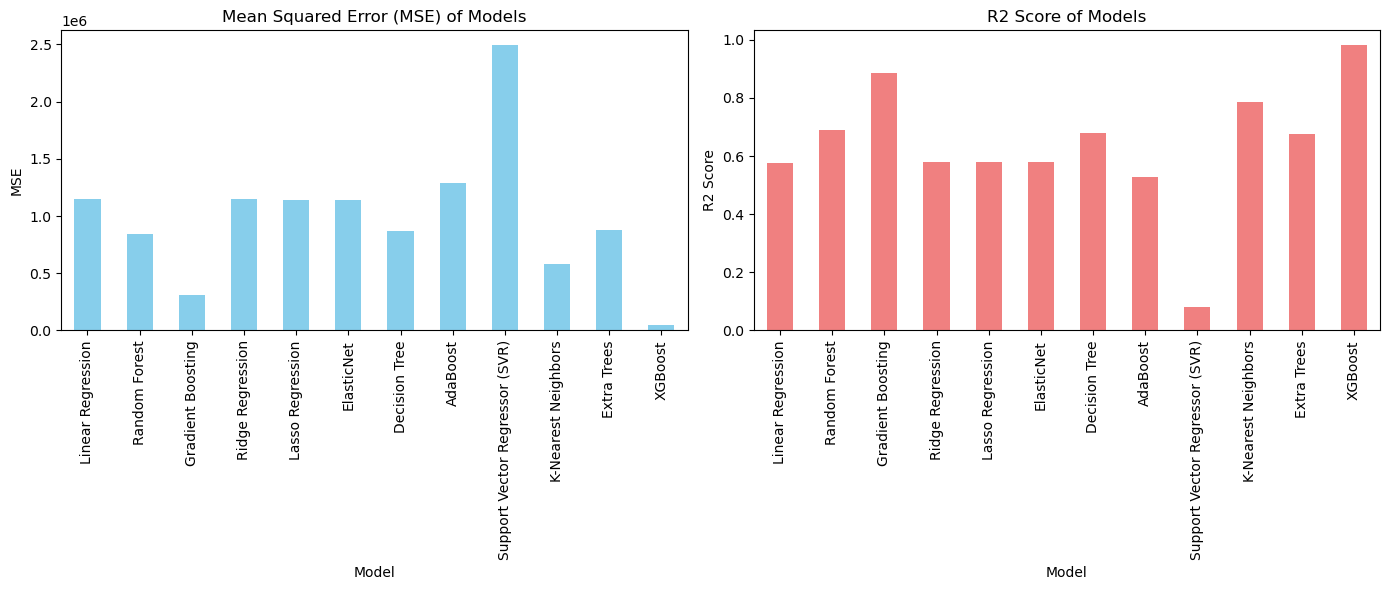

In [17]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting MSE
results_df['MSE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE) of Models')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Model')

# Plotting R2 Score
results_df['R2 Score'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('R2 Score of Models')
axes[1].set_ylabel('R2 Score')
axes[1].set_xlabel('Model')

plt.tight_layout()
plt.show()


In [ ]:
#Best Model is XGBOOSt